In [1]:
# indir <- "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist/Flt3l/outs/filtered_peak_bc_matrix/"

# indir_mgatk <- "/data2/mito_lineage/data/processed/mttrace/CHIP_april08_2021/MTblacklist/Flt3l/MT/cellr_True/Flt3l_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/filter_mgatk/"
# name <- "Flt3l"
# outdir <- "/data2/mito_lineage/Analysis/annotation/output/data/"
# prefix <- "CHIP_april08_2021_Croker/MTblacklist/"
# external_dat_file <- "granja_published_C1.rds"
# external_dat_dir <- "/data2/mito_lineage/Analysis/annotation/output/data/granja_cd34"
# nTop = 25000
singlecell_sumstats_dir <- "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist/"

frag_file <- "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist/Flt3l/outs/fragments.tsv.gz"
exp <- "Flt3l"
outdir <- "/data2/mito_lineage/Analysis/annotation/output/data/"
prefix <- "CHIP_april08_2021_Croker/MTblacklist/"
external_dat_file <- "granja_10X_CD34.rds"
#external_dat_dir <- "/data2/mito_lineage/Analysis/annotation/output/data/"
nTop = 25000



In [2]:
library(future)
plan()
#plan("multiprocess", workers = workers)
options(future.globals.maxSize = 8000 * 1024^2)

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

In [3]:
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)

library(magrittr)

Attaching SeuratObject

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: 

In [4]:
# genedir <- outdir
# outdir <- file.path(outdir, prefix)
# outdir

## Import data

In [5]:
#curr_SE <- readRDS(file.path(outdir, paste0(exp, ".cd34.rds")))
curr_SE <- readRDS(file.path(outdir, paste0(exp, ".rds")))

In [6]:

ext_SE <- readRDS(file.path(outdir, external_dat_file))
#curr_SE[['tech']] <- exp
ext_SE[['tech']] <-'granja_cd34'

ext_SE <- subset(x = ext_SE, subset = Group %in% c("BM_pDC", "CLP", "CMP", "GMP", "HSC", "LMPP", "MEP", "Monocytes", "MPP"))
DefaultAssay(ext_SE) <- 'ATAC'
ext_SE[['tech']] <-'granja_cd34'
ext_SE <- subset(x = ext_SE, subset = Group %in% c("BM_pDC", "CLP", "CMP", "GMP", "HSC", "LMPP", "MEP", "Monocytes", "MPP"))
DefaultAssay(ext_SE) <- 'ATAC'

In [7]:
ext_SE[["ATAC"]]@data

   [[ suppressing 31 column names 'BM_pDC#160818_BM1137_pDC_LS_37', 'BM_pDC#160818_BM1137_pDC_LS_45', 'BM_pDC#160818_BM1137_pDC_LS_82' ... ]]

   [[ suppressing 31 column names 'BM_pDC#160818_BM1137_pDC_LS_37', 'BM_pDC#160818_BM1137_pDC_LS_45', 'BM_pDC#160818_BM1137_pDC_LS_82' ... ]]

   [[ suppressing 31 column names 'BM_pDC#160818_BM1137_pDC_LS_37', 'BM_pDC#160818_BM1137_pDC_LS_45', 'BM_pDC#160818_BM1137_pDC_LS_82' ... ]]



673629 x 2196 sparse Matrix of class "dgCMatrix"
                                                                                         
chr1-9872-10738      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ......
chr1-96454-96767     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-115476-115976   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-180692-181142   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-191619-191976   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-236856-237356   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-237511-238011   . . . . . 1 . . 1 1 . . . . . . . . . . . . 1 . 1 . . . . . . ......
chr1-240801-241301   . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . ......
chr1-250084-250584   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-267770-268268   . . . . . . . . . . . . . . . 

In [8]:
# compute LSI
ext_SE <- FindTopFeatures(ext_SE, min.cutoff = 10)
ext_SE <- RunTFIDF(ext_SE)
ext_SE <- RunSVD(ext_SE)

# compute LSI
curr_SE <- FindTopFeatures(curr_SE, min.cutoff = 10)
curr_SE <- RunTFIDF(curr_SE)
curr_SE <- RunSVD(curr_SE)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings



In [9]:
# merge
pbmc.combined <- merge(ext_SE, curr_SE)

# process the combined dataset
pbmc.combined <- FindTopFeatures(pbmc.combined, min.cutoff = 10)
pbmc.combined <- RunTFIDF(pbmc.combined)
pbmc.combined <- RunSVD(pbmc.combined)
pbmc.combined <- RunUMAP(pbmc.combined, reduction = "lsi", dims = 2:30)


Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
03:16:27 UMAP embedding parameters a = 0.9922 b = 1.112

03:16:27 Read 7509 rows and found 29 numeric columns

03:16:27 Using Annoy for neighbor search, n_neighbors = 30

03:16:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:16:28 Writing NN index file to temp file /tmp/RtmprVIvZw/

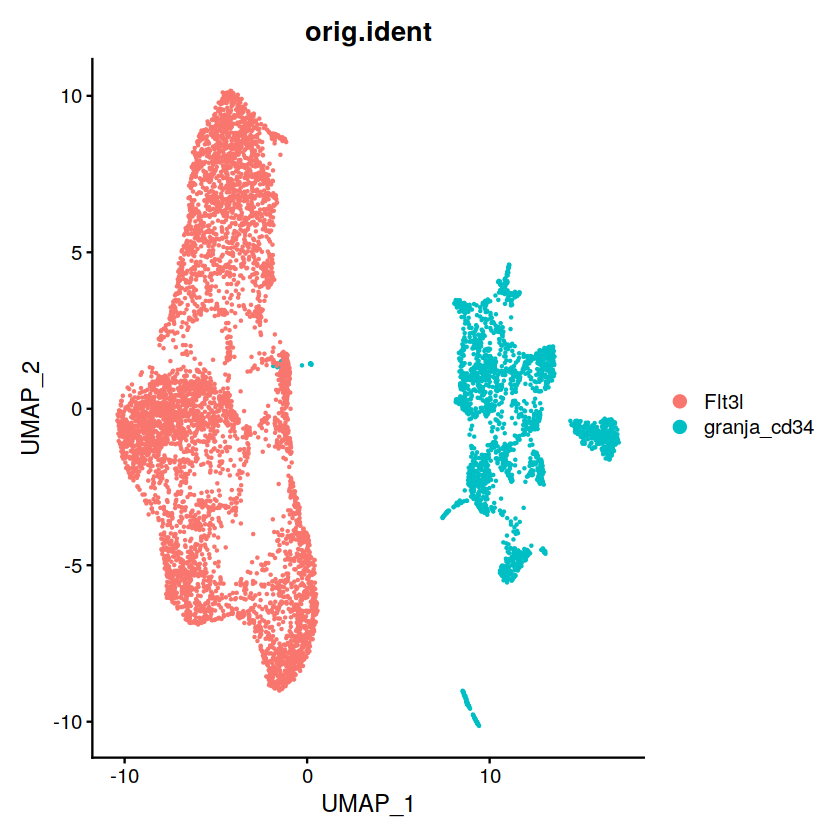

In [10]:
p1 <- DimPlot(pbmc.combined, group.by = "orig.ident")
p1

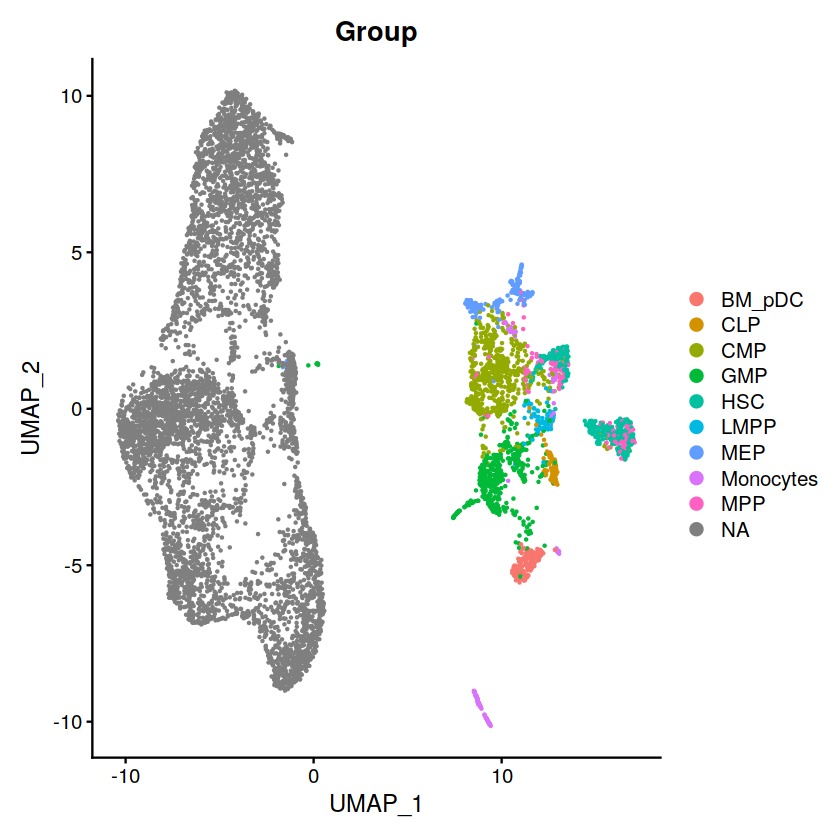

In [16]:
p1 <- DimPlot(pbmc.combined, group.by = "Group")
p1

In [11]:
# find integration anchors
integration.anchors <- FindIntegrationAnchors(
  object.list = list(ext_SE, curr_SE),
  anchor.features = rownames(ext_SE),
  reduction = "rlsi",
  dims = 2:30
)

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
"No filtering performed if passing to data rather than counts"
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 57 anchors



In [12]:
# integrate LSI embeddings
integrated <- IntegrateEmbeddings(
  anchorset = integration.anchors,
  reductions = pbmc.combined[["lsi"]],
  new.reduction.name = "integrated_lsi",
  dims.to.integrate = 1:30,
  k.weight=20
)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [13]:
# create a new UMAP using the integrated embeddings
integrated <- RunUMAP(integrated, reduction = "integrated_lsi", dims = 2:30)


03:19:45 UMAP embedding parameters a = 0.9922 b = 1.112

03:19:45 Read 7509 rows and found 29 numeric columns

03:19:45 Using Annoy for neighbor search, n_neighbors = 30

03:19:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:19:47 Writing NN index file to temp file /tmp/RtmprVIvZw/file601511d01ea

03:19:47 Searching Annoy index using 1 thread, search_k = 3000

03:19:51 Annoy recall = 100%

03:19:54 Commencing smooth kNN distance calibration using 1 thread

03:19:57 Initializing from normalized Laplacian + noise

03:19:57 Commencing optimization for 500 epochs, with 313288 positive edges

03:20:08 Optimization finished



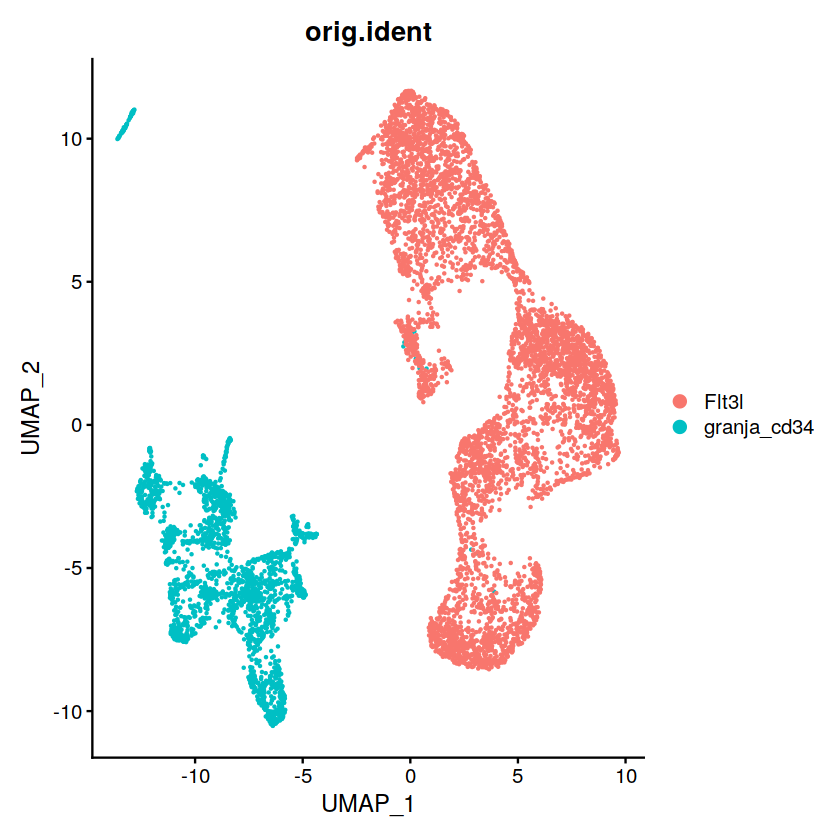

In [14]:
p2 <- DimPlot(integrated, group.by = "orig.ident")
p2

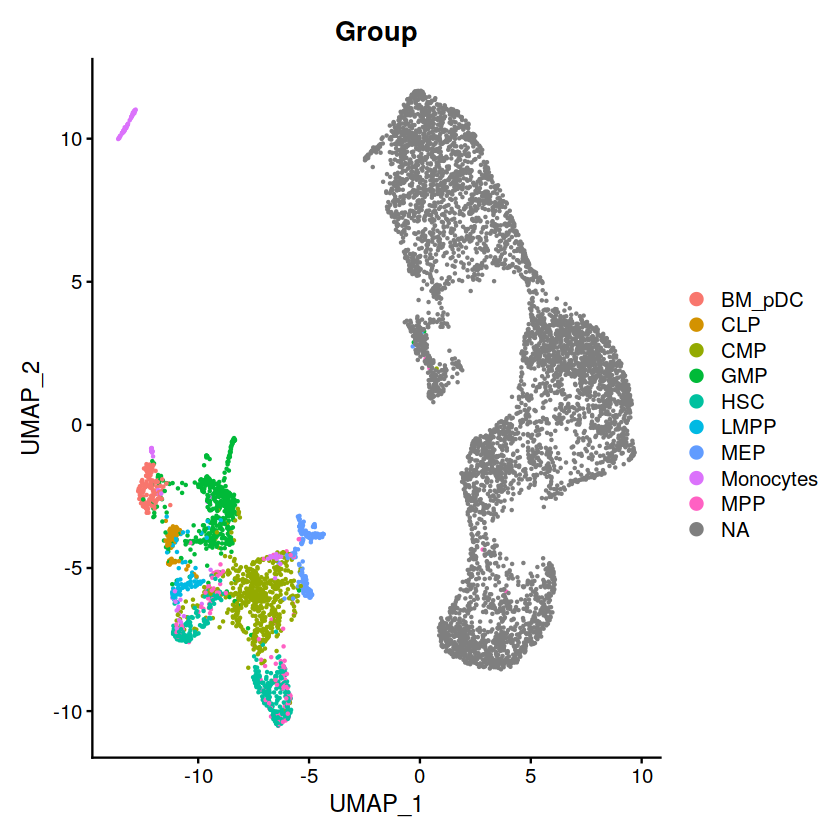

In [17]:
p2 <- DimPlot(integrated, group.by = "Group")
p2

In [20]:
# compute UMAP and store the UMAP model
ext <- RunUMAP(ext_SE, reduction = "lsi", dims = 2:30, return.model = TRUE)


UMAP will return its model

03:33:35 UMAP embedding parameters a = 0.9922 b = 1.112

03:33:35 Read 2196 rows and found 29 numeric columns

03:33:35 Using Annoy for neighbor search, n_neighbors = 30

03:33:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:33:35 Writing NN index file to temp file /tmp/RtmprVIvZw/file60154703b2b6

03:33:35 Searching Annoy index using 1 thread, search_k = 3000

03:33:36 Annoy recall = 100%

03:33:37 Commencing smooth kNN distance calibration using 1 thread

03:33:38 Initializing from normalized Laplacian + noise

03:33:39 Commencing optimization for 500 epochs, with 83438 positive edges

03:33:43 Optimization finished



In [21]:
# find transfer anchors
transfer.anchors <- FindTransferAnchors(
  reference = ext_SE,
  query = curr_SE,
  reference.reduction = "lsi",
  reduction = "lsiproject",
  dims = 2:30
)

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3567 anchors



In [ ]:
# map query onto the reference dataset
curr <- MapQuery(
  anchorset = transfer.anchors,
  reference = ext_SE,
  query = curr_SE,
  refdata = ext_SE$Group,
  reference.reduction = "lsi",
  new.reduction.name = "ref.lsi",
  reduction.model = 'umap'
)

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Integrating dataset 2 with reference dataset

Finding integration vectors

Integrating data

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from ref.lsi_ to reflsi_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from ref.lsi_ to reflsi_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to reflsi_"


In [ ]:
curr_SE <- TransferData(
  anchorset = transfer.anchors, 
  reference = ext_SE,
  weight.reduction = "lsiproject",
  query = curr_SE,
  refdata = list(
    celltype = "predicted.id",
    predicted_RNA = "RNA")
)
curr_SE <- IntegrateEmbeddings(
  anchorset = transfer.anchors,
  reference = ext_SE,
  query = curr_SE, 
  reductions = "lsiproject",
  new.reduction.name = "ref.lsi"
)
curr_SE <- ProjectUMAP(
  query = curr_SE, 
  query.reduction = "ref.lsi",
  reference = ext_SE, 
  reference.reduction = "lsi",
  reduction.model = "umap"
)

In [ ]:
print